# Enunciado de la pregunta #
En la imágen .tif que encuentra en éste repo (y pública en la URL en la parte inferior) un residente del universo paralelo 12.4999 le han enviado un mensaje oculto. Utilice su conocimiento de procesamiento de imágenes para descubrirlo.

# Algoritmos a utilizar y por qué: #

- Debido a que no hay señales de ruido, ni elementos que requieran resaltar, por el momento se descargan los usos de filtros de sharpening y lineales.

- Primero se necesita saber cómo están distribuidos los colores en la imagen para saber qué se debe aplicar. El histograma mostrará cuántas veces aparece un color en la imagen y actua como un contador. A simple vista parece ser una imagen en blanco y negro, por lo que se haría una ecualización. La ecualización permite redistribuir mejor los colores de la imagen para así destacar elementos.

- Luego de obtener los resultados del histograma y la ecualización, con la nueva información, se decidirá si se debe hacer uso de otros filtros para mostrar el mensaje. 

- Al obtener los resultados, se ve el mensaje pero no con gran calidad o nítido, por lo que se aplicará el filtro de perfilado de Laplace para que resalte los bordes y así sea más nítido. 

# Código para descrubir el mensaje oculto#

In [1]:
#Importar librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

#Cargar la imagen al notebook
base = "https://canaval.org/assets/"

img = "incognitus.tif"
url = f"{base}{img}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  113k  100  113k    0     0   773k      0 --:--:-- --:--:-- --:--:--  773k


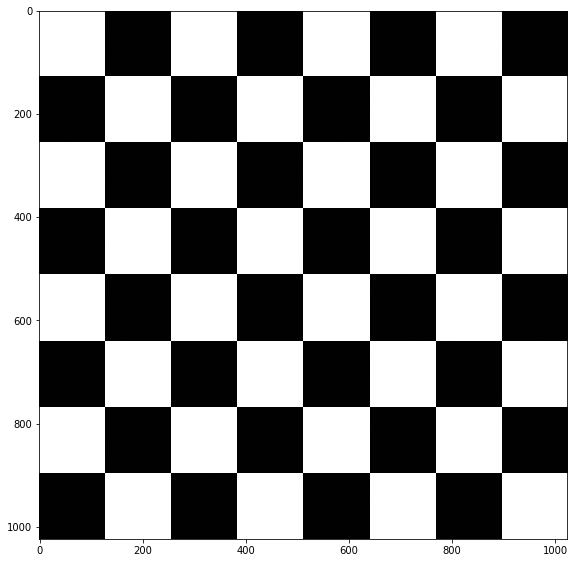

In [3]:
#Mostrar la imagen original
def show(im, size=8):
  _, ax = plt.subplots(figsize=(size, size))
  ax.imshow(im, interpolation="nearest")
  plt.tight_layout()
  plt.show()

def loadImg(img):
  im = cv2.imread(img)
  return im[:,:,::-1]

im = loadImg(img)
show(im)

(1024, 1024)


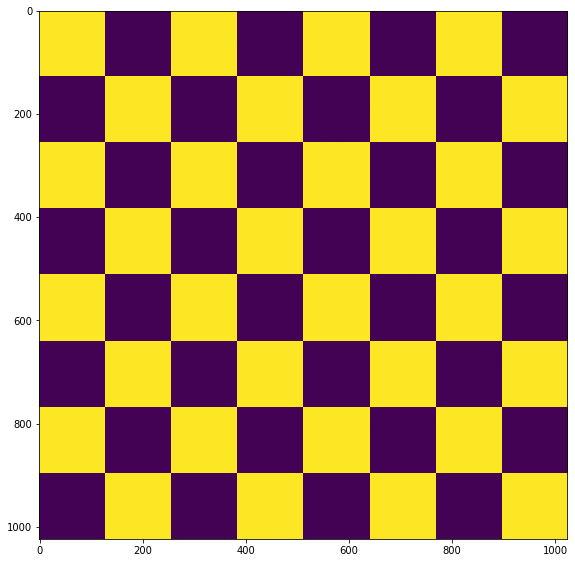

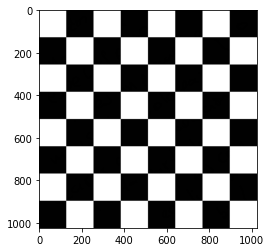

In [7]:
#Transformar la imagen en un formato que se pueda trabajar y mostrarla nuevamente
mensaje = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print(mensaje.shape)
show(mensaje)
plt.imshow(mensaje, 'gray')

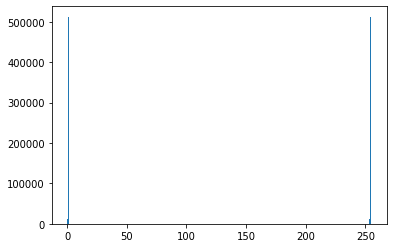

In [21]:
#Aplicación de algoritmos para poder mostrar el mensaje
plt.hist(mensaje.ravel(), 256)
plt.show()

def equalize_hist(im):
  rows, cols = im.shape
  hist, bins = np.histogram(im, bins=256, range=(0, 256))
  hist = hist / (rows * cols)
  
  accum = np.zeros((256))
  accum[0] = hist[0]
  for i in range(1, 256):
    accum[i] = accum[i - 1] + hist[i]

  out = np.zeros((rows, cols))

  for i in range(rows):
    for j in range(cols):
      out[i, j] = accum[im[i, j]]

  return np.floor(256*out + 0.5).astype(np.int)

def laplace(imgs, mask):
  imgs2 = cv2.filter2D(src=imgs, ddepth=-1, kernel=mask)
  plt.subplots(figsize=(10, 10))
  plt.subplot(1, 2, 1)
  plt.imshow(imgs, cmap="gray")
  plt.axis("off")
  plt.subplot(1, 2, 2)
  plt.imshow(imgs2, cmap="gray")
  plt.axis("off")
  plt.show()


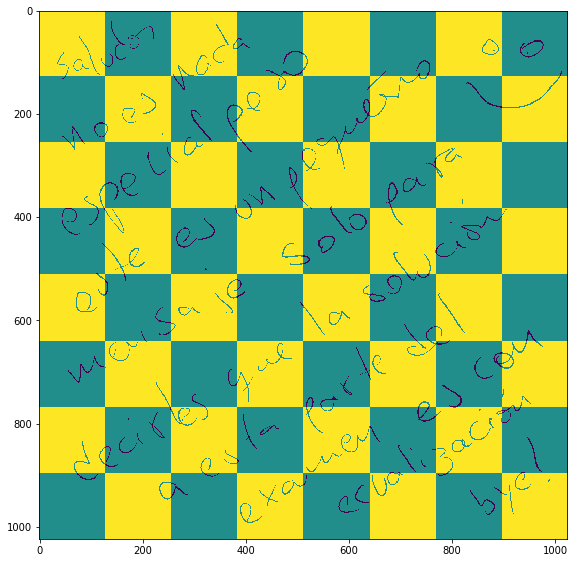

In [24]:
#Mostrar la imagen con el mensaje descubierto
mask = np.array([0, 1, 0, 1, -8, 1, 0, 1, 0]).reshape(3, 3)
Mensaje_Resuelto1 = equalize_hist(mensaje)
#Mensaje_Resuelto = laplace(Mensaje_Resuelto1, mask) Sale un error, pero la idea era hacer que resalten más las letras de la imagen
show(Mensaje_Resuelto1) 

# Procedimiento y Algoritmos a utilizar para ocultar mensajes #
- Debido a que se quiere ocultar los mensajes, se utilizarán filtros que hagan la imagen más homogenia como el de la matriz gaussiana para que el mensaje esté oculto y el filtro de la mediana para un mayor difuminado, permitiendo esconder mejor los mensajes. 

- La mediana es un filtro tipo estadístico (no lineal) que es el mejor para eliminar el ruido sal y pimienta, pero en este caso se utilizarán sus propiedades para difuminar/suavizado/blurrear para ocultar el mensaje.

- Solo se podrá desbloquear, cuando se vuelva la imagen heterogénea, o logren ecualizar la imagen. 

# Código para ocultar mensajes #

In [25]:
#Filtro Gaussiano

#Máscara para el filtro Gaussiano
mask1 = np.array([1, 2, 1, 2, 4, 2, 1, 2, 1]).reshape(3, 3)
mask = mask / np.sum(mask1)

def Gaussiana(im, mask):
  rowsMask, colsMask = mask.shape
  rowPadding = rowsMask // 2
  colPadding = colsMask // 2

  rows, cols = im.shape

  temp = np.zeros((rows + 2*rowPadding, cols + 2*colPadding))
  temp[rowPadding:rowPadding+rows, colPadding:colPadding+cols] = im

  out = np.zeros_like(temp)

  for r in range(rows):
    for c in range(cols):
      out[r + rowPadding, c + colPadding] = np.sum(
        np.multiply(mask, temp[r:r+rowsMask, c:c+colsMask]))

  return out[rowPadding:rowPadding+rows, colPadding:colPadding+cols]

#Filtro de la mediana
def Mediana(img):
  img1 = cv2.medianBlur(img, 3)
  plt.subplots(figsize=(14, 14))
  plt.subplot(1, 2, 1)
  plt.imshow(img, cmap="gray")
  plt.axis("off")
  plt.subplot(1, 2, 2)
  plt.imshow(img1, cmap="gray")
  plt.axis("off")
  plt.show()
  return img1


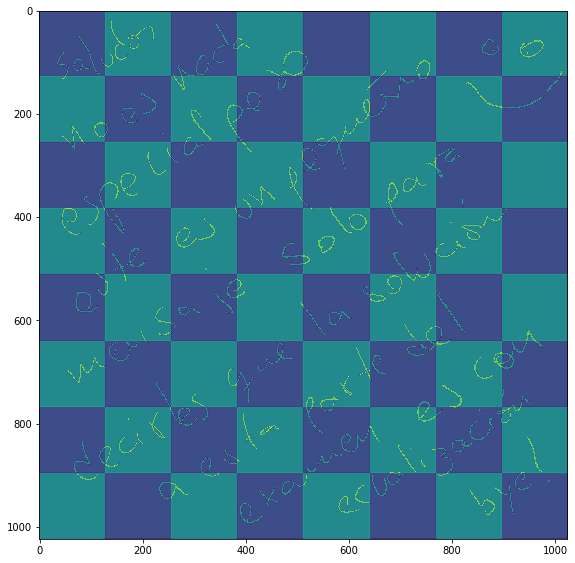

In [27]:
Mensaje_Oculto = Gaussiana(Mensaje_Resuelto1,mask)
#Mensaje_Oculto2 = Mediana(Mensaje_Oculto) se quería hacer la mediana pero sale un error raro de OpenCV
show(Mensaje_Oculto)